In [1]:
pip install geopandas fiona matplotlib rasterio lxml

     ---------------------------------------- 0.0/51.5 kB ? eta -:--:--
     ---------------------------------------- 51.5/51.5 kB 2.6 MB/s eta 0:00:00
  Using cached click_plugins-1.1.1-py2.py3-none-any.whl.metadata (6.4 kB)
  Using cached cligj-0.7.2-py3-none-any.whl.metadata (5.0 kB)
   ---------------------------------------- 0.0/22.9 MB ? eta -:--:--
   ---------------------------------------- 0.2/22.9 MB 4.6 MB/s eta 0:00:05
    --------------------------------------- 0.3/22.9 MB 3.7 MB/s eta 0:00:07
    --------------------------------------- 0.5/22.9 MB 3.8 MB/s eta 0:00:06
   - -------------------------------------- 0.7/22.9 MB 3.8 MB/s eta 0:00:06
   - -------------------------------------- 0.8/22.9 MB 3.7 MB/s eta 0:00:06
   - -------------------------------------- 1.0/22.9 MB 3.6 MB/s eta 0:00:07
   -- ------------------------------------- 1.2/22.9 MB 3.6 MB/s eta 0:00:06
   -- ------------------------------------- 1.4/22.9 MB 3.7 MB/s eta 0:00:06
   -- --------------------


[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [25]:
pip install path_to_downloaded_file.whl


Note: you may need to restart the kernel to use updated packages.


ERROR: path_to_downloaded_file.whl is not a valid wheel filename.

[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd
from functools import reduce
from shapely import wkt
import geopandas as gpd
from shapely.geometry import box
import matplotlib.pyplot as plt
import numpy as np
import rasterio
from rasterio.plot import show
import os

# 인프라 병합

In [14]:
# SHP 파일의 경로 (다른 관련 파일들은 자동으로 연결됨)
path_경찰서 = "(B100)국토통계_국토정책지표-경찰서접근성-500M_2022/204.2 경찰서(시군구격자) 접근성.shp"

# GeoDataFrame으로 파일 읽어오기
gdf_경찰서 = gpd.read_file(path_경찰서, encoding = 'utf-8')
gdf_경찰서 = gdf_경찰서[gdf_경찰서['sgg_nm_k'] == '춘천시'][['gid', 'value', 'geometry']].reset_index(drop=True)

In [25]:
# SHP 파일의 경로 (다른 관련 파일들은 자동으로 연결됨)
path_소방서 = "(B100)국토통계_국토정책지표-소방서 접근성 -500M_2022/206.2 소방서(시군구격자) 접근성.shp"

# GeoDataFrame으로 파일 읽어오기
gdf_소방서 = gpd.read_file(path_소방서, encoding = 'utf-8')
gdf_소방서 = gdf_소방서[gdf_소방서['sgg_nm_k'] == '춘천시'][['gid', 'value', 'geometry']].reset_index(drop=True)

In [28]:
# SHP 파일의 경로 (다른 관련 파일들은 자동으로 연결됨)
path_병원 = "(B100)국토통계_국토정책지표-병원 접근성-500M_2022/143.2 병원(시군구격자) 접근성.shp"

# GeoDataFrame으로 파일 읽어오기
gdf_병원 = gpd.read_file(path_병원, encoding = 'utf-8')
gdf_병원 = gdf_병원[gdf_병원['sgg_nm_k'] == '춘천시'][['gid', 'value', 'geometry']].reset_index(drop=True)

In [29]:
# SHP 파일의 경로 (다른 관련 파일들은 자동으로 연결됨)
path_보건기관 = "(B100)국토통계_국토정책지표-보건기관 접근성 -500M_2022/131.2 보건기관(시군구격자) 접근성.shp"

# GeoDataFrame으로 파일 읽어오기
gdf_보건기관 = gpd.read_file(path_보건기관, encoding = 'utf-8')
gdf_보건기관 = gdf_보건기관[gdf_보건기관['sgg_nm_k'] == '춘천시'][['gid', 'value', 'geometry']].reset_index(drop=True)

In [30]:
# SHP 파일의 경로 (다른 관련 파일들은 자동으로 연결됨)
path_응급의료시설 = "(B100)국토통계_국토정책지표-응급의료시설 접근성-500M_2022/155.2 응급의료시설(시군구격자) 접근성.shp"

# GeoDataFrame으로 파일 읽어오기
gdf_응급의료시설 = gpd.read_file(path_응급의료시설, encoding = 'utf-8')
gdf_응급의료시설 = gdf_응급의료시설[gdf_응급의료시설['sgg_nm_k'] == '춘천시'][['gid', 'value', 'geometry']].reset_index(drop=True)

In [31]:
# SHP 파일의 경로 (다른 관련 파일들은 자동으로 연결됨)
path_의원 = "(B100)국토통계_국토정책지표-의원 접근성-500M_2022/137.2 의원(시군구격자) 접근성.shp"

# GeoDataFrame으로 파일 읽어오기
gdf_의원 = gpd.read_file(path_의원, encoding = 'utf-8')
gdf_의원 = gdf_의원[gdf_의원['sgg_nm_k'] == '춘천시'][['gid', 'value', 'geometry']].reset_index(drop=True)

In [39]:
len(set(gdf_소방서['gid']) & set(gdf_경찰서['gid']) & set(gdf_병원['gid']) & set(gdf_보건기관['gid']) & set(gdf_응급의료시설['gid']) & set(gdf_의원['gid']))

4465

In [40]:
# 각 GeoDataFrame의 'value' 컬럼 이름을 변경
gdf_소방서 = gdf_소방서.rename(columns={'value': 'value_소방서'})
gdf_경찰서 = gdf_경찰서.rename(columns={'value': 'value_경찰서'})
gdf_병원 = gdf_병원.rename(columns={'value': 'value_병원'})
gdf_보건기관 = gdf_보건기관.rename(columns={'value': 'value_보건기관'})
gdf_응급의료시설 = gdf_응급의료시설.rename(columns={'value': 'value_응급의료시설'})
gdf_의원 = gdf_의원.rename(columns={'value': 'value_의원'})

# 공통적으로 'gid'와 'geometry'를 기준으로 데이터프레임을 병합
dfs = [gdf_소방서, gdf_경찰서, gdf_병원, gdf_보건기관, gdf_응급의료시설, gdf_의원]
gdf_merged = reduce(lambda left, right: pd.merge(left, right, on=['gid', 'geometry'], how='outer'), dfs)

In [43]:
gdf_merged = gdf_merged[['gid', 'geometry', 'value_소방서', 'value_경찰서', 'value_병원', 'value_보건기관', 'value_응급의료시설', 'value_의원']]

In [47]:
gdf_merged

,gid,geometry,value_소방서,value_경찰서,value_병원,value_보건기관,value_응급의료시설,value_의원
0,라사00b69a,"POLYGON ((1000500 1969000, 1000500 1969500, 10...",20.961,25.755,36.655,9.500,39.476,31.857
1,라사00b69b,"POLYGON ((1000500 1969500, 1000500 1970000, 10...",21.390,21.965,37.084,9.929,39.905,32.286
2,라사00b70a,"POLYGON ((1000500 1970000, 1000500 1970500, 10...",8.106,7.724,10.478,3.718,36.820,7.712
3,라사01a68b,"POLYGON ((1001000 1968500, 1001000 1969000, 10...",21.034,25.828,36.728,9.573,39.548,31.930
4,라사01a69a,"POLYGON ((1001000 1969000, 1001000 1969500, 10...",20.542,25.336,36.236,9.081,39.056,31.438
...,...,...,...,...,...,...,...,...
4460,라아45a02a,"POLYGON ((1045000 2002000, 1045000 2002500, 10...",19.427,13.345,20.072,13.216,20.072,20.139
4461,라아45b01a,"POLYGON ((1045500 2001000, 1045500 2001500, 10...",21.095,11.145,21.740,11.747,21.740,21.806
4462,라아45b01b,"POLYGON ((1045500 2001500, 1045500 2002000, 10...",20.963,11.307,21.608,11.909,21.608,21.674
4463,라아45b02a,"POLYGON ((1045500 2002000, 1045500 2002500, 10...",18.966,12.883,19.611,12.754,19.611,19.677


In [45]:
gdf_merged.to_csv('춘천시_인프라.csv', encoding='utf-8')

# 춘천시 격자

In [2]:
춘천_total = pd.read_csv('df_total_0910.csv', index_col=0)
춘천_total['geometry'] = 춘천_total['geometry'].apply(wkt.loads) # geometry 값으로 변환
춘천_gdf_total = gpd.GeoDataFrame(춘천_total, geometry=춘천_total['geometry'], crs="EPSG:5179")

춘천_gdf_total.crs

<Projected CRS: EPSG:5179>
Name: KGD2002 / Unified CS
Axis Info [cartesian]:
- X[north]: Northing (metre)
- Y[east]: Easting (metre)
Area of Use:
- name: Republic of Korea (South Korea) - onshore and offshore.
- bounds: (122.71, 28.6, 134.28, 40.27)
Coordinate Operation:
- name: Korea Unified Belt
- method: Transverse Mercator
Datum: Korean Geodetic Datum 2002
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

# 배수등급

### https://www.vworld.kr/dtmk/dtmk_ntads_s002.do?svcCde=MK&dsId=30491

In [3]:
gdf_배수등급 = gpd.read_file("배수등급/ASIT_SOILDRA_AREA.shp", encoding = 'cp949')
print(gdf_배수등급.crs)

# 좌표계가 데이터 내 없어, 수동으로 EPSG:5174를 설정(데이터 설명 참고)
gdf_배수등급.crs = "EPSG:5174"
print(gdf_배수등급.crs)

None
EPSG:5174


In [4]:
gdf_배수등급.head()

,AREA,PERIMETER,CODE_DC,SOILDRA,geometry
0,20154500.0,26673.40,999.0,기타,"POLYGON ((319656.375 558049, 319533.688 566264..."
1,1210520.0,5359.01,1.0,매우양호,"POLYGON ((322243.25 557865.188, 322186.812 557..."
2,187981.0,3806.03,2.0,양호,"POLYGON ((320190.375 558161.438, 320195.312 55..."
3,3612200.0,22563.10,2.0,양호,"POLYGON ((323624 558160.875, 323669.969 558107..."
4,102804.0,4164.06,999.0,기타,"POLYGON ((323669.969 558107.75, 323694 558080,..."


In [5]:
# 좌표계를 EPSG:5179(춘천시 격자 단위)로 변환 
gdf_배수등급_transformed = gdf_배수등급.to_crs("EPSG:5179")

In [6]:
print(gdf_배수등급_transformed.crs)
gdf_배수등급_transformed.head()

EPSG:5179


,AREA,PERIMETER,CODE_DC,SOILDRA,geometry
0,20154500.0,26673.40,999.0,기타,"POLYGON ((1076085.091 2057799.991, 1076006.994..."
1,1210520.0,5359.01,1.0,매우양호,"POLYGON ((1078669.602 2057602.268, 1078612.719..."
2,187981.0,3806.03,2.0,양호,"POLYGON ((1076619.418 2057909.478, 1076624.358..."
3,3612200.0,22563.10,2.0,양호,"POLYGON ((1080051.219 2057890.321, 1080096.875..."
4,102804.0,4164.06,999.0,기타,"POLYGON ((1080096.875 2057836.975, 1080120.744..."


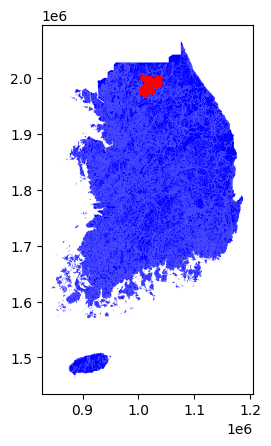

In [7]:
# 전체 배수등급 데이터 시각화
ax = gdf_배수등급_transformed.plot(color='blue', edgecolor='none')

# 춘천시 격자 데이터 시각화
춘천_gdf_total.plot(ax=ax, color='red', edgecolor='none')

plt.show()

In [8]:
# 2. 춘천시 격자, 전국 배수등급 교집합 추출

gdf_intersection_춘천 = gpd.overlay(gdf_배수등급_transformed, 춘천_gdf_total, how='intersection')

In [9]:
gdf_intersection_춘천 # FID와 격자 매핑필요

,AREA,PERIMETER,CODE_DC,SOILDRA,gid,고령인구,20년 노후건물 비율,생산가능인구,유아비율,총인구,...,20년 이상 노후건물 수,노후건물비율,value_소방서,value_경찰서,value_병원,value_보건기관,value_응급의료시설,value_의원,읍면동,geometry
0,3.679320e+09,1.049790e+07,1.0,매우양호,라아07a06a,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,8.462,8.858,27.050,8.830,20.215,8.878,사북면,"MULTIPOLYGON (((1007011.389 2006113.199, 10070..."
1,3.679320e+09,1.049790e+07,1.0,매우양호,라아12a05b,9.0,9.0,0.0,0.0,14.0,...,2.0,6.00,0.000,0.000,0.000,0.000,0.000,0.000,사북면,"POLYGON ((1012265.679 2005937.117, 1012203.258..."
2,3.679320e+09,1.049790e+07,1.0,매우양호,라아08b04b,23.0,23.0,6.0,0.0,32.0,...,0.0,inf,12.396,8.324,25.237,8.323,18.402,12.812,사북면,"POLYGON ((1008577.476 2004605.004, 1008593.739..."
3,3.679320e+09,1.049790e+07,1.0,매우양호,라아08b05b,14.0,14.0,9.0,0.0,24.0,...,4.0,2.25,10.541,7.994,24.907,7.993,18.072,10.957,사북면,"POLYGON ((1008582.525 2005500.094, 1008609.867..."
4,3.679320e+09,1.049790e+07,1.0,매우양호,라아08a03b,0.0,0.0,0.0,0.0,0.0,...,0.0,inf,13.473,9.401,26.314,9.400,19.480,13.890,사북면,"POLYGON ((1008101.148 2003969.985, 1008081.356..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17785,3.121610e+05,6.900660e+03,3.0,약간양호,라사13a64a,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.000,0.000,0.000,0.000,0.000,0.000,남산면,"POLYGON ((1013335.615 1964001.289, 1013346.24 ..."
17786,1.704510e+04,8.348760e+02,2.0,양호,라사12b64a,0.0,0.0,0.0,0.0,0.0,...,2.0,4.00,0.000,0.000,0.000,0.000,0.000,0.000,남산면,"POLYGON ((1012661.814 1964321.735, 1012776.644..."
17787,5.789710e+03,3.072930e+02,3.0,약간양호,라사12b64a,0.0,0.0,0.0,0.0,0.0,...,2.0,4.00,0.000,0.000,0.000,0.000,0.000,0.000,남산면,"POLYGON ((1012654.006 1964295.506, 1012671.996..."
17788,3.065850e+04,1.325580e+03,3.0,약간양호,라사09b64a,8.0,8.0,0.0,0.0,9.0,...,10.0,1.30,6.835,6.488,20.189,1.007,33.017,13.005,남면,"POLYGON ((1009997.245 1964140.238, 1009903.747..."


In [10]:
gdf_intersection_춘천.columns

Index(['AREA', 'PERIMETER', 'CODE_DC', 'SOILDRA', 'gid', '고령인구', '20년 노후건물 비율',
       '생산가능인구', '유아비율', '총인구', '개별주택가격', '주거용도면적', '공시지가', '지상층수',
       '용적율', '지하층수', '대지면적', '연면적', '높이',
       '건폐율', '건축면적', '전체건물수', '20년 이상 노후건물 수', '노후건물비율',
       'value_소방서', 'value_경찰서', 'value_병원', 'value_보건기관', 'value_응급의료시설',
       'value_의원', '읍면동', 'geometry'],
      dtype='object')

In [11]:
gdf_intersection_춘천.columns

Index(['AREA', 'PERIMETER', 'CODE_DC', 'SOILDRA', 'gid', '고령인구', '20년 노후건물 비율',
       '생산가능인구', '유아비율', '총인구', '개별주택가격', '주거용도면적', '공시지가', '지상층수',
       '용적율', '지하층수', '대지면적', '연면적', '높이',
       '건폐율', '건축면적', '전체건물수', '20년 이상 노후건물 수', '노후건물비율',
       'value_소방서', 'value_경찰서', 'value_병원', 'value_보건기관', 'value_응급의료시설',
       'value_의원', '읍면동', 'geometry'],
      dtype='object')

In [12]:
gdf_intersection_춘천['AREA_cal'] = gdf_intersection_춘천['geometry'].area # polygon 크기 기준으로 면적 크기 재계산
gdf_intersection_춘천

,AREA,PERIMETER,CODE_DC,SOILDRA,gid,고령인구,20년 노후건물 비율,생산가능인구,유아비율,총인구,...,노후건물비율,value_소방서,value_경찰서,value_병원,value_보건기관,value_응급의료시설,value_의원,읍면동,geometry,AREA_cal
0,3.679320e+09,1.049790e+07,1.0,매우양호,라아07a06a,0.0,0.0,0.0,0.0,0.0,...,0.00,8.462,8.858,27.050,8.830,20.215,8.878,사북면,"MULTIPOLYGON (((1007011.389 2006113.199, 10070...",29592.030791
1,3.679320e+09,1.049790e+07,1.0,매우양호,라아12a05b,9.0,9.0,0.0,0.0,14.0,...,6.00,0.000,0.000,0.000,0.000,0.000,0.000,사북면,"POLYGON ((1012265.679 2005937.117, 1012203.258...",29626.981006
2,3.679320e+09,1.049790e+07,1.0,매우양호,라아08b04b,23.0,23.0,6.0,0.0,32.0,...,inf,12.396,8.324,25.237,8.323,18.402,12.812,사북면,"POLYGON ((1008577.476 2004605.004, 1008593.739...",8959.387191
3,3.679320e+09,1.049790e+07,1.0,매우양호,라아08b05b,14.0,14.0,9.0,0.0,24.0,...,2.25,10.541,7.994,24.907,7.993,18.072,10.957,사북면,"POLYGON ((1008582.525 2005500.094, 1008609.867...",7263.993687
4,3.679320e+09,1.049790e+07,1.0,매우양호,라아08a03b,0.0,0.0,0.0,0.0,0.0,...,inf,13.473,9.401,26.314,9.400,19.480,13.890,사북면,"POLYGON ((1008101.148 2003969.985, 1008081.356...",17760.498171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17785,3.121610e+05,6.900660e+03,3.0,약간양호,라사13a64a,0.0,0.0,0.0,0.0,0.0,...,0.00,0.000,0.000,0.000,0.000,0.000,0.000,남산면,"POLYGON ((1013335.615 1964001.289, 1013346.24 ...",23.484231
17786,1.704510e+04,8.348760e+02,2.0,양호,라사12b64a,0.0,0.0,0.0,0.0,0.0,...,4.00,0.000,0.000,0.000,0.000,0.000,0.000,남산면,"POLYGON ((1012661.814 1964321.735, 1012776.644...",17029.861262
17787,5.789710e+03,3.072930e+02,3.0,약간양호,라사12b64a,0.0,0.0,0.0,0.0,0.0,...,4.00,0.000,0.000,0.000,0.000,0.000,0.000,남산면,"POLYGON ((1012654.006 1964295.506, 1012671.996...",5784.554810
17788,3.065850e+04,1.325580e+03,3.0,약간양호,라사09b64a,8.0,8.0,0.0,0.0,9.0,...,1.30,6.835,6.488,20.189,1.007,33.017,13.005,남면,"POLYGON ((1009997.245 1964140.238, 1009903.747...",16691.034858


250000.0


<Axes: >

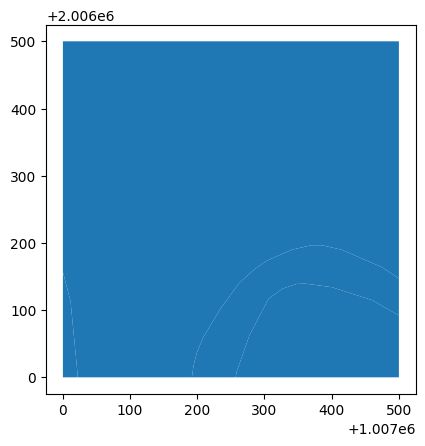

In [13]:
print(sum(gdf_intersection_춘천[gdf_intersection_춘천['gid'] == gdf_intersection_춘천['gid'][0]]['AREA_cal']))
gdf_intersection_춘천[gdf_intersection_춘천['gid'] == gdf_intersection_춘천['gid'][0]].plot()

In [14]:
gdf_intersection_춘천[gdf_intersection_춘천['gid'] == gdf_intersection_춘천['gid'][0]].index

Index([0, 324, 2414], dtype='int64')

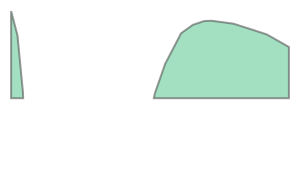

In [15]:
gdf_intersection_춘천[gdf_intersection_춘천['gid'] == gdf_intersection_춘천['gid'][0]].loc[0, 'geometry']

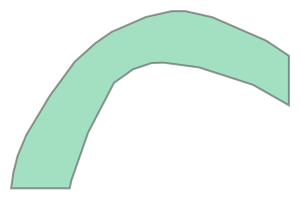

In [16]:
gdf_intersection_춘천[gdf_intersection_춘천['gid'] == gdf_intersection_춘천['gid'][0]].loc[324, 'geometry']

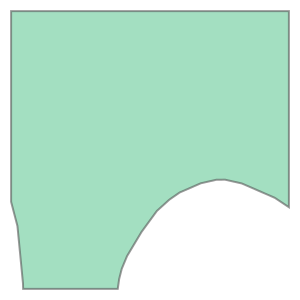

In [17]:
gdf_intersection_춘천[gdf_intersection_춘천['gid'] == gdf_intersection_춘천['gid'][0]].loc[2414, 'geometry']

In [18]:
# 계산된 면적, 원래 면적의 비율 비교

df_temp = gdf_intersection_춘천[gdf_intersection_춘천['gid'] == gdf_intersection_춘천['gid'][0]][['AREA', 'AREA_cal']]

area_sum = df_temp['AREA'].sum()
area_cal_sum = df_temp['AREA_cal'].sum()

df_temp['AREA_normalized'] = df_temp['AREA'] / area_sum
df_temp['AREA_cal_normalized'] = df_temp['AREA_cal'] / area_cal_sum

print(df_temp)

print('*'*100)

# 원래 면적의 합은 격자마다 크기가 다름, but 새로 계산한 경우 같아짐

print(sum(gdf_intersection_춘천[gdf_intersection_춘천['gid'] == gdf_intersection_춘천['gid'][0]]['AREA']))
print(sum(gdf_intersection_춘천[gdf_intersection_춘천['gid'] == gdf_intersection_춘천['gid'][1]]['AREA']))
print(sum(gdf_intersection_춘천[gdf_intersection_춘천['gid'] == gdf_intersection_춘천['gid'][0]]['AREA_cal']))
print(sum(gdf_intersection_춘천[gdf_intersection_춘천['gid'] == gdf_intersection_춘천['gid'][1]]['AREA_cal']))

              AREA       AREA_cal  AREA_normalized  AREA_cal_normalized
0     3.679320e+09   29592.030791         0.841605             0.118368
324   6.808510e+08   20781.291347         0.155737             0.083125
2414  1.161770e+07  199626.677862         0.002657             0.798507
****************************************************************************************************
4371788700.0
4496800048.0
250000.0
250000.0


In [19]:
gdf_intersection_춘천[['CODE_DC', 'SOILDRA']].drop_duplicates()

,CODE_DC,SOILDRA
0,1.0,매우양호
189,999.0,기타
2411,2.0,양호
3043,3.0,약간양호
3779,4.0,약간불량
3835,6.0,매우불량


<Axes: >

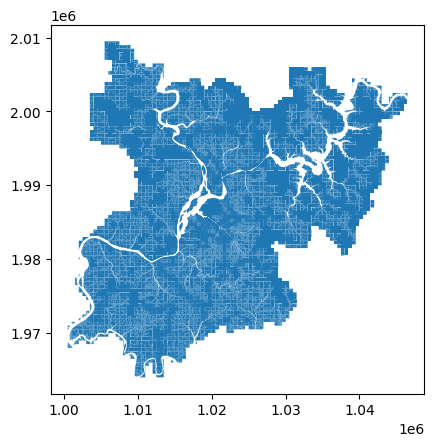

In [20]:
gdf_intersection_춘천[gdf_intersection_춘천['SOILDRA'] != '기타']['geometry'].plot()

In [21]:
gdf_intersection_춘천['CODE_DC'] = gdf_intersection_춘천['CODE_DC'].replace(999, 0)

In [22]:
# 빈 dictionary 초기화
배수등급_dict = {}

# gid별로 데이터 그룹화
grouped = gdf_intersection_춘천.groupby('gid')

# 각 그룹에 대해 필요한 계산을 수행
for gid, group in grouped:
    group['AREA_cal_ratio'] = (group['AREA_cal'] / group['AREA_cal'].sum()).round(2)
    배수_score = np.dot(group['CODE_DC'], group['AREA_cal_ratio']).round(2)
    
    # 결과를 dict에 저장
    배수등급_dict[gid] = 배수_score

In [23]:
배수등급_dict # 낮을수록 좋음

{'라사00b68a': 1.99,
 '라사00b68b': 0.26,
 '라사00b69a': 0.82,
 '라사00b69b': 1.1,
 '라사00b70a': 0.27,
 '라사00b70b': 0.62,
 '라사01a68a': 0.3,
 '라사01a68b': 0.23,
 '라사01a69a': 1.59,
 '라사01a69b': 1.58,
 '라사01a70a': 1.51,
 '라사01a70b': 0.48,
 '라사01a71a': 0.82,
 '라사01b68b': 1.5,
 '라사01b69a': 0.51,
 '라사01b69b': 1.54,
 '라사01b70a': 1.46,
 '라사01b70b': 1.41,
 '라사01b71a': 0.27,
 '라사01b76b': 1.05,
 '라사01b77a': 1.06,
 '라사02a69a': 1.86,
 '라사02a69b': 0.83,
 '라사02a70a': 1.21,
 '라사02a70b': 1.28,
 '라사02a71a': 1.45,
 '라사02a71b': 0.67,
 '라사02a75b': 1.6,
 '라사02a76a': 0.64,
 '라사02a76b': 1.39,
 '라사02a77a': 0.92,
 '라사02a77b': 0.25,
 '라사02a80a': 0.11,
 '라사02a80b': 0.46,
 '라사02a81a': 0.56,
 '라사02a81b': 0.8,
 '라사02a82a': 1.7,
 '라사02b69a': 1.02,
 '라사02b69b': 1.21,
 '라사02b70a': 1.54,
 '라사02b70b': 1.26,
 '라사02b71a': 1.72,
 '라사02b71b': 0.83,
 '라사02b72a': 1.44,
 '라사02b75a': 1.38,
 '라사02b75b': 0.33,
 '라사02b76a': 1.17,
 '라사02b76b': 0.93,
 '라사02b77a': 0.82,
 '라사02b77b': 0.92,
 '라사02b78a': 0.51,
 '라사02b78b': 0.02,
 '라사02b79b': 0.0,


In [24]:
print(gdf_intersection_춘천.columns)
gdf_intersection_춘천

Index(['AREA', 'PERIMETER', 'CODE_DC', 'SOILDRA', 'gid', '고령인구', '20년 노후건물 비율',
       '생산가능인구', '유아비율', '총인구', '개별주택가격', '주거용도면적', '공시지가', '지상층수',
       '용적율', '지하층수', '대지면적', '연면적', '높이',
       '건폐율', '건축면적', '전체건물수', '20년 이상 노후건물 수', '노후건물비율',
       'value_소방서', 'value_경찰서', 'value_병원', 'value_보건기관', 'value_응급의료시설',
       'value_의원', '읍면동', 'geometry', 'AREA_cal'],
      dtype='object')


,AREA,PERIMETER,CODE_DC,SOILDRA,gid,고령인구,20년 노후건물 비율,생산가능인구,유아비율,총인구,...,노후건물비율,value_소방서,value_경찰서,value_병원,value_보건기관,value_응급의료시설,value_의원,읍면동,geometry,AREA_cal
0,3.679320e+09,1.049790e+07,1.0,매우양호,라아07a06a,0.0,0.0,0.0,0.0,0.0,...,0.00,8.462,8.858,27.050,8.830,20.215,8.878,사북면,"MULTIPOLYGON (((1007011.389 2006113.199, 10070...",29592.030791
1,3.679320e+09,1.049790e+07,1.0,매우양호,라아12a05b,9.0,9.0,0.0,0.0,14.0,...,6.00,0.000,0.000,0.000,0.000,0.000,0.000,사북면,"POLYGON ((1012265.679 2005937.117, 1012203.258...",29626.981006
2,3.679320e+09,1.049790e+07,1.0,매우양호,라아08b04b,23.0,23.0,6.0,0.0,32.0,...,inf,12.396,8.324,25.237,8.323,18.402,12.812,사북면,"POLYGON ((1008577.476 2004605.004, 1008593.739...",8959.387191
3,3.679320e+09,1.049790e+07,1.0,매우양호,라아08b05b,14.0,14.0,9.0,0.0,24.0,...,2.25,10.541,7.994,24.907,7.993,18.072,10.957,사북면,"POLYGON ((1008582.525 2005500.094, 1008609.867...",7263.993687
4,3.679320e+09,1.049790e+07,1.0,매우양호,라아08a03b,0.0,0.0,0.0,0.0,0.0,...,inf,13.473,9.401,26.314,9.400,19.480,13.890,사북면,"POLYGON ((1008101.148 2003969.985, 1008081.356...",17760.498171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17785,3.121610e+05,6.900660e+03,3.0,약간양호,라사13a64a,0.0,0.0,0.0,0.0,0.0,...,0.00,0.000,0.000,0.000,0.000,0.000,0.000,남산면,"POLYGON ((1013335.615 1964001.289, 1013346.24 ...",23.484231
17786,1.704510e+04,8.348760e+02,2.0,양호,라사12b64a,0.0,0.0,0.0,0.0,0.0,...,4.00,0.000,0.000,0.000,0.000,0.000,0.000,남산면,"POLYGON ((1012661.814 1964321.735, 1012776.644...",17029.861262
17787,5.789710e+03,3.072930e+02,3.0,약간양호,라사12b64a,0.0,0.0,0.0,0.0,0.0,...,4.00,0.000,0.000,0.000,0.000,0.000,0.000,남산면,"POLYGON ((1012654.006 1964295.506, 1012671.996...",5784.554810
17788,3.065850e+04,1.325580e+03,3.0,약간양호,라사09b64a,8.0,8.0,0.0,0.0,9.0,...,1.30,6.835,6.488,20.189,1.007,33.017,13.005,남면,"POLYGON ((1009997.245 1964140.238, 1009903.747...",16691.034858


In [25]:
춘천_gdf_total['배수_score'] = 춘천_gdf_total['gid'].map(배수등급_dict)

# 경사도
### https://www.vworld.kr/dtmk/dtmk_ntads_s002.do?searchKeyword=&searchOrganization=&searchBrmCode=&searchTagList=&searchFrm=&pageIndex=1&gidmCd=06&gidsCd=0603&sortType=00&svcCde=MK&dsId=30495&listPageIndex=1

In [26]:
gdf_경사도 = gpd.read_file("경사도/ASIT_SOILSLOPE_AREA\ASIT_SOILSLOPE_AREA.shp", encoding = 'cp949')
print(gdf_경사도.crs)
# 좌표계가 데이터 내 없어, 수동으로 EPSG:5181를 설정(데이터 설명 참고)
gdf_경사도.crs = "EPSG:5181"
print(gdf_경사도.crs)
gdf_경사도.head()
# 좌표계를 EPSG:5179(춘천시 격자 단위)로 변환 

None
EPSG:5181


,AREA,PERIMETER,CODE_SL,SOILSLOPE,geometry
0,20154500.0,26673.40,999.0,기타,"POLYGON ((319656.375 558049, 319533.688 566264..."
1,1210520.0,5359.01,5.0,30-60%,"POLYGON ((322243.25 557865.188, 322186.812 557..."
2,187981.0,3806.03,3.0,7-15%,"POLYGON ((320190.375 558161.438, 320195.312 55..."
3,2697960.0,16340.20,5.0,30-60%,"POLYGON ((323624 558160.875, 323669.969 558107..."
4,102804.0,4164.06,999.0,기타,"POLYGON ((323669.969 558107.75, 323694 558080,..."


In [27]:
gdf_경사도_transformed = gdf_경사도.to_crs("EPSG:5179")
print(gdf_경사도_transformed.crs)
gdf_경사도_transformed.head()

EPSG:5179


,AREA,PERIMETER,CODE_SL,SOILSLOPE,geometry
0,20154500.0,26673.40,999.0,기타,"POLYGON ((1076016.644 2057494.156, 1075938.689..."
1,1210520.0,5359.01,5.0,30-60%,"POLYGON ((1078601.172 2057296.385, 1078544.287..."
2,187981.0,3806.03,3.0,7-15%,"POLYGON ((1076550.977 2057603.634, 1076555.916..."
3,2697960.0,16340.20,5.0,30-60%,"POLYGON ((1079982.806 2057584.417, 1080028.462..."
4,102804.0,4164.06,999.0,기타,"POLYGON ((1080028.462 2057531.07, 1080052.33 2..."


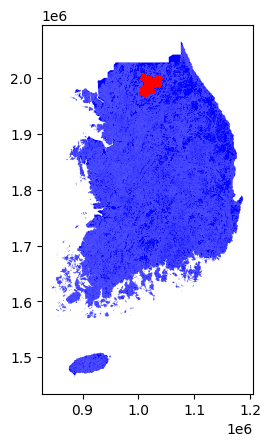

In [28]:
# 전체 경사도 데이터 시각화
ax = gdf_경사도_transformed.plot(color='blue', edgecolor='none')

# 춘천시 격자 데이터 시각화
춘천_gdf_total.plot(ax=ax, color='red', edgecolor='none')
plt.show()

In [29]:
# 2. 춘천시 격자, 전국 경사도 교집합 추출

gdf_intersection_춘천_경사도 = gpd.overlay(gdf_경사도_transformed, 춘천_gdf_total, how='intersection')
gdf_intersection_춘천_경사도 # FID와 격자 매핑필요

,AREA,PERIMETER,CODE_SL,SOILSLOPE,gid,고령인구,20년 노후건물 비율,생산가능인구,유아비율,총인구,...,노후건물비율,value_소방서,value_경찰서,value_병원,value_보건기관,value_응급의료시설,value_의원,읍면동,배수_score,geometry
0,4.052800e+09,1.122610e+07,6.0,60-100%,라사14a90a,8.0,8.0,0.0,0.0,12.0,...,1.666667,10.803,6.866,10.056,2.639,13.656,9.849,서면,1.52,"POLYGON ((1014272.157 1990481.293, 1014271.891..."
1,4.052800e+09,1.122610e+07,6.0,60-100%,라사13a83b,0.0,0.0,0.0,0.0,0.0,...,inf,12.748,11.989,15.425,8.867,17.070,11.458,서면,1.18,"POLYGON ((1013478.945 1983996.456, 1013470.708..."
2,4.052800e+09,1.122610e+07,6.0,60-100%,라사15b93a,13.0,13.0,11.0,0.0,25.0,...,7.000000,8.432,4.496,7.683,3.681,11.285,7.478,서면,2.14,"POLYGON ((1015817.163 1993021.733, 1015819.953..."
3,4.052800e+09,1.122610e+07,6.0,60-100%,라사26b74a,15.0,15.0,15.0,0.0,30.0,...,3.200000,17.006,15.630,14.927,2.328,16.505,12.961,동산면,1.78,"POLYGON ((1026996.862 1974474.989, 1026991.347..."
4,4.052800e+09,1.122610e+07,6.0,60-100%,라사04b83a,0.0,0.0,0.0,0.0,0.0,...,1.000000,8.736,8.688,22.483,5.815,23.193,9.394,서면,1.69,"POLYGON ((1004542.811 1983443.938, 1004500 198..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22613,6.741380e+03,3.676440e+02,3.0,7-15%,라사13a64a,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000,0.000,0.000,0.000,0.000,0.000,남산면,0.88,"POLYGON ((1013146.096 1964446.686, 1013119.172..."
22614,8.036110e+04,2.046260e+03,3.0,7-15%,라사09b64a,8.0,8.0,0.0,0.0,9.0,...,1.300000,6.835,6.488,20.189,1.007,33.017,13.005,남면,1.53,"POLYGON ((1009975.916 1964027.311, 1009945.874..."
22615,8.036110e+04,2.046260e+03,3.0,7-15%,라사10a64a,18.0,18.0,7.0,0.0,27.0,...,3.000000,7.089,6.741,20.442,1.261,33.271,13.259,남면,1.52,"POLYGON ((1010134.424 1964000, 1010057.256 196..."
22616,5.593270e+03,3.396170e+02,3.0,7-15%,라사09b64a,8.0,8.0,0.0,0.0,9.0,...,1.300000,6.835,6.488,20.189,1.007,33.017,13.005,남면,1.53,"POLYGON ((1009750.385 1964024.11, 1009749.424 ..."


In [30]:
gdf_intersection_춘천_경사도['AREA_cal'] = gdf_intersection_춘천_경사도['geometry'].area # polygon 크기 기준으로 면적 크기 재계산
gdf_intersection_춘천_경사도

,AREA,PERIMETER,CODE_SL,SOILSLOPE,gid,고령인구,20년 노후건물 비율,생산가능인구,유아비율,총인구,...,value_소방서,value_경찰서,value_병원,value_보건기관,value_응급의료시설,value_의원,읍면동,배수_score,geometry,AREA_cal
0,4.052800e+09,1.122610e+07,6.0,60-100%,라사14a90a,8.0,8.0,0.0,0.0,12.0,...,10.803,6.866,10.056,2.639,13.656,9.849,서면,1.52,"POLYGON ((1014272.157 1990481.293, 1014271.891...",30948.656391
1,4.052800e+09,1.122610e+07,6.0,60-100%,라사13a83b,0.0,0.0,0.0,0.0,0.0,...,12.748,11.989,15.425,8.867,17.070,11.458,서면,1.18,"POLYGON ((1013478.945 1983996.456, 1013470.708...",67.810205
2,4.052800e+09,1.122610e+07,6.0,60-100%,라사15b93a,13.0,13.0,11.0,0.0,25.0,...,8.432,4.496,7.683,3.681,11.285,7.478,서면,2.14,"POLYGON ((1015817.163 1993021.733, 1015819.953...",235038.497025
3,4.052800e+09,1.122610e+07,6.0,60-100%,라사26b74a,15.0,15.0,15.0,0.0,30.0,...,17.006,15.630,14.927,2.328,16.505,12.961,동산면,1.78,"POLYGON ((1026996.862 1974474.989, 1026991.347...",155.627061
4,4.052800e+09,1.122610e+07,6.0,60-100%,라사04b83a,0.0,0.0,0.0,0.0,0.0,...,8.736,8.688,22.483,5.815,23.193,9.394,서면,1.69,"POLYGON ((1004542.811 1983443.938, 1004500 198...",5595.986373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22613,6.741380e+03,3.676440e+02,3.0,7-15%,라사13a64a,0.0,0.0,0.0,0.0,0.0,...,0.000,0.000,0.000,0.000,0.000,0.000,남산면,0.88,"POLYGON ((1013146.096 1964446.686, 1013119.172...",3675.107408
22614,8.036110e+04,2.046260e+03,3.0,7-15%,라사09b64a,8.0,8.0,0.0,0.0,9.0,...,6.835,6.488,20.189,1.007,33.017,13.005,남면,1.53,"POLYGON ((1009975.916 1964027.311, 1009945.874...",18433.640728
22615,8.036110e+04,2.046260e+03,3.0,7-15%,라사10a64a,18.0,18.0,7.0,0.0,27.0,...,7.089,6.741,20.442,1.261,33.271,13.259,남면,1.52,"POLYGON ((1010134.424 1964000, 1010057.256 196...",60411.403742
22616,5.593270e+03,3.396170e+02,3.0,7-15%,라사09b64a,8.0,8.0,0.0,0.0,9.0,...,6.835,6.488,20.189,1.007,33.017,13.005,남면,1.53,"POLYGON ((1009750.385 1964024.11, 1009749.424 ...",2218.171190


4072395500.0


<Axes: >

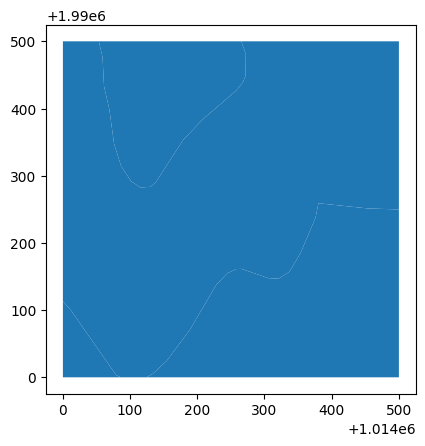

In [31]:
print(sum(gdf_intersection_춘천_경사도[gdf_intersection_춘천_경사도['gid'] == gdf_intersection_춘천_경사도['gid'][0]]['AREA']))
gdf_intersection_춘천_경사도[gdf_intersection_춘천_경사도['gid'] == gdf_intersection_춘천_경사도['gid'][0]].plot()

In [32]:
gdf_intersection_춘천_경사도[gdf_intersection_춘천_경사도['gid'] == gdf_intersection_춘천_경사도['gid'][0]].index

Index([0, 8818, 9703], dtype='int64')

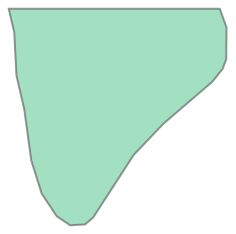

In [33]:
gdf_intersection_춘천_경사도[gdf_intersection_춘천_경사도['gid'] == gdf_intersection_춘천_경사도['gid'][0]].loc[0, 'geometry']

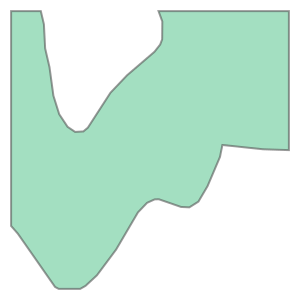

In [34]:
gdf_intersection_춘천_경사도[gdf_intersection_춘천_경사도['gid'] == gdf_intersection_춘천_경사도['gid'][0]].loc[8818, 'geometry']

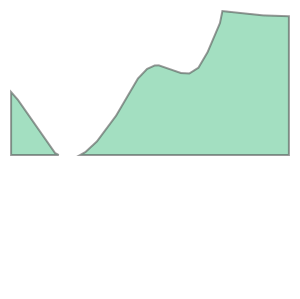

In [35]:
gdf_intersection_춘천_경사도[gdf_intersection_춘천_경사도['gid'] == gdf_intersection_춘천_경사도['gid'][0]].loc[9703, 'geometry']

In [36]:
df_temp1 = gdf_intersection_춘천_경사도[gdf_intersection_춘천_경사도['gid'] == gdf_intersection_춘천_경사도['gid'][0]][['AREA', 'AREA_cal']]

area_sum1 = df_temp1['AREA'].sum()
area_cal_sum1 = df_temp1['AREA_cal'].sum()

df_temp1['AREA_normalized'] = df_temp1['AREA'] / area_sum1
df_temp1['AREA_cal_normalized'] = df_temp1['AREA_cal'] / area_cal_sum1

print(df_temp1)

print('*'*100)

print(sum(gdf_intersection_춘천_경사도[gdf_intersection_춘천_경사도['gid'] == gdf_intersection_춘천_경사도['gid'][0]]['AREA']))
print(sum(gdf_intersection_춘천_경사도[gdf_intersection_춘천_경사도['gid'] == gdf_intersection_춘천_경사도['gid'][1]]['AREA']))
print(sum(gdf_intersection_춘천_경사도[gdf_intersection_춘천_경사도['gid'] == gdf_intersection_춘천_경사도['gid'][0]]['AREA_cal']))
print(sum(gdf_intersection_춘천_경사도[gdf_intersection_춘천_경사도['gid'] == gdf_intersection_춘천_경사도['gid'][1]]['AREA_cal']))


              AREA       AREA_cal  AREA_normalized  AREA_cal_normalized
0     4.052800e+09   30948.656391         0.995188             0.123795
8818  1.844060e+07  152651.809173         0.004528             0.610607
9703  1.154900e+06   66399.534436         0.000284             0.265598
****************************************************************************************************
4072395500.0
4063436505.0
249999.99999999997
250000.0


In [37]:
gdf_intersection_춘천_경사도[['CODE_SL', 'SOILSLOPE']].drop_duplicates()

,CODE_SL,SOILSLOPE
0,6.0,60-100%
1429,999.0,기타
3706,5.0,30-60%
3733,3.0,7-15%
3743,4.0,15-30%
3840,2.0,2-7%
3850,1.0,0-2%


<Axes: >

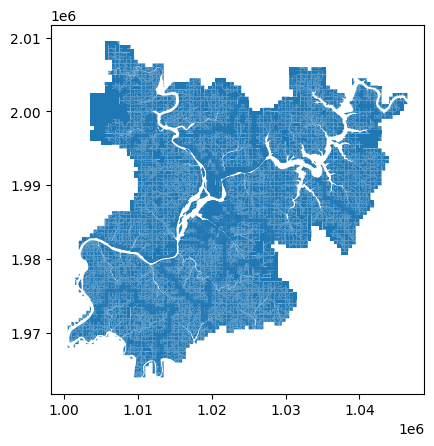

In [38]:
gdf_intersection_춘천_경사도[gdf_intersection_춘천_경사도['SOILSLOPE'] != '기타']['geometry'].plot() # 경사도 '기타'

<Axes: >

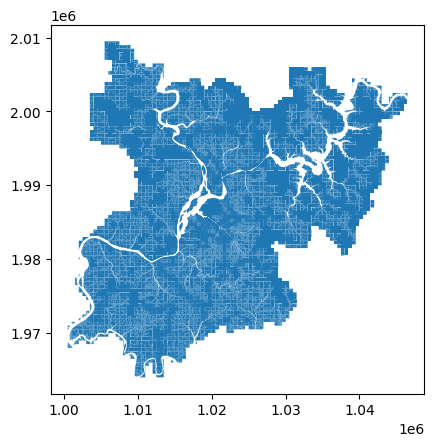

In [39]:
gdf_intersection_춘천[gdf_intersection_춘천['SOILDRA'] != '기타']['geometry'].plot() # 배수등급 '기타'

In [40]:
gdf_intersection_춘천_경사도['CODE_SL'] = gdf_intersection_춘천_경사도['CODE_SL'].replace(999, 0)

In [41]:
gdf_intersection_춘천_경사도

,AREA,PERIMETER,CODE_SL,SOILSLOPE,gid,고령인구,20년 노후건물 비율,생산가능인구,유아비율,총인구,...,value_소방서,value_경찰서,value_병원,value_보건기관,value_응급의료시설,value_의원,읍면동,배수_score,geometry,AREA_cal
0,4.052800e+09,1.122610e+07,6.0,60-100%,라사14a90a,8.0,8.0,0.0,0.0,12.0,...,10.803,6.866,10.056,2.639,13.656,9.849,서면,1.52,"POLYGON ((1014272.157 1990481.293, 1014271.891...",30948.656391
1,4.052800e+09,1.122610e+07,6.0,60-100%,라사13a83b,0.0,0.0,0.0,0.0,0.0,...,12.748,11.989,15.425,8.867,17.070,11.458,서면,1.18,"POLYGON ((1013478.945 1983996.456, 1013470.708...",67.810205
2,4.052800e+09,1.122610e+07,6.0,60-100%,라사15b93a,13.0,13.0,11.0,0.0,25.0,...,8.432,4.496,7.683,3.681,11.285,7.478,서면,2.14,"POLYGON ((1015817.163 1993021.733, 1015819.953...",235038.497025
3,4.052800e+09,1.122610e+07,6.0,60-100%,라사26b74a,15.0,15.0,15.0,0.0,30.0,...,17.006,15.630,14.927,2.328,16.505,12.961,동산면,1.78,"POLYGON ((1026996.862 1974474.989, 1026991.347...",155.627061
4,4.052800e+09,1.122610e+07,6.0,60-100%,라사04b83a,0.0,0.0,0.0,0.0,0.0,...,8.736,8.688,22.483,5.815,23.193,9.394,서면,1.69,"POLYGON ((1004542.811 1983443.938, 1004500 198...",5595.986373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22613,6.741380e+03,3.676440e+02,3.0,7-15%,라사13a64a,0.0,0.0,0.0,0.0,0.0,...,0.000,0.000,0.000,0.000,0.000,0.000,남산면,0.88,"POLYGON ((1013146.096 1964446.686, 1013119.172...",3675.107408
22614,8.036110e+04,2.046260e+03,3.0,7-15%,라사09b64a,8.0,8.0,0.0,0.0,9.0,...,6.835,6.488,20.189,1.007,33.017,13.005,남면,1.53,"POLYGON ((1009975.916 1964027.311, 1009945.874...",18433.640728
22615,8.036110e+04,2.046260e+03,3.0,7-15%,라사10a64a,18.0,18.0,7.0,0.0,27.0,...,7.089,6.741,20.442,1.261,33.271,13.259,남면,1.52,"POLYGON ((1010134.424 1964000, 1010057.256 196...",60411.403742
22616,5.593270e+03,3.396170e+02,3.0,7-15%,라사09b64a,8.0,8.0,0.0,0.0,9.0,...,6.835,6.488,20.189,1.007,33.017,13.005,남면,1.53,"POLYGON ((1009750.385 1964024.11, 1009749.424 ...",2218.171190


In [42]:
# 빈 dictionary 초기화
경사도_dict = {}

# gid별로 데이터 그룹화
grouped = gdf_intersection_춘천_경사도.groupby('gid')

# 각 그룹에 대해 필요한 계산을 수행
for gid, group in grouped:
    # AREA_cal_ratio 계산
    group['AREA_cal_ratio'] = (group['AREA_cal'] / group['AREA_cal'].sum()).round(2)
    
    # 경사도_score 계산
    경사도_score = np.dot(group['CODE_SL'], group['AREA_cal_ratio']).round(2)
    
    # 결과를 dict에 저장
    경사도_dict[gid] = 경사도_score

In [43]:
경사도_dict # 높을수록 가파름

{'라사00b68a': 0.82,
 '라사00b68b': 0.58,
 '라사00b69a': 1.5,
 '라사00b69b': 1.29,
 '라사00b70a': 0.3,
 '라사00b70b': 2.05,
 '라사01a68a': 1.29,
 '라사01a68b': 0.85,
 '라사01a69a': 4.87,
 '라사01a69b': 5.79,
 '라사01a70a': 4.5,
 '라사01a70b': 0.4,
 '라사01a71a': 2.31,
 '라사01b68b': 2.9,
 '라사01b69a': 3.12,
 '라사01b69b': 4.92,
 '라사01b70a': 5.4,
 '라사01b70b': 3.69,
 '라사01b71a': 1.88,
 '라사01b76b': 1.57,
 '라사01b77a': 2.32,
 '라사02a69a': 1.2,
 '라사02a69b': 5.61,
 '라사02a70a': 5.37,
 '라사02a70b': 5.19,
 '라사02a71a': 1.52,
 '라사02a71b': 2.46,
 '라사02a75b': 1.88,
 '라사02a76a': 0.62,
 '라사02a76b': 0.66,
 '라사02a77a': 0.17,
 '라사02a77b': 0.35,
 '라사02a80a': 0.68,
 '라사02a80b': 1.41,
 '라사02a81a': 0.94,
 '라사02a81b': 3.18,
 '라사02a82a': 5.85,
 '라사02b69a': 2.12,
 '라사02b69b': 5.61,
 '라사02b70a': 5.67,
 '라사02b70b': 5.55,
 '라사02b71a': 4.2,
 '라사02b71b': 0.39,
 '라사02b72a': 3.13,
 '라사02b75a': 0.98,
 '라사02b75b': 2.05,
 '라사02b76a': 3.73,
 '라사02b76b': 3.73,
 '라사02b77a': 3.59,
 '라사02b77b': 3.32,
 '라사02b78a': 1.23,
 '라사02b78b': 0.0,
 '라사02b79b': 0.65,
 '

In [44]:
춘천_gdf_total['경사도_score'] = 춘천_gdf_total['gid'].map(경사도_dict)

# 산사태

In [45]:
import rasterio
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point

# TIFF 파일 경로
tif_file = "산사태위험도/51110.tif"

# TIFF 파일 열기
with rasterio.open(tif_file) as dataset:
    # TIFF 데이터 읽기 (첫 번째 밴드)
    band1 = dataset.read(1)
    # 좌표 변환 함수 설정
    transform = dataset.transform

# GeoDataFrame 만들기
rows, cols = band1.shape
data = []

for row in range(rows):
    for col in range(cols):
        # 해당 픽셀의 좌표 계산
        x, y = rasterio.transform.xy(transform, row, col)
        value = band1[row, col]
        
        # NoData 값을 제외하고 데이터 추가
        if value != 0:  # NoData 값은 0으로 가정
            data.append({"geometry": Point(x, y), "value": value})

# GeoDataFrame으로 변환
gdf_산사태 = gpd.GeoDataFrame(data, crs=dataset.crs)

In [46]:
gdf_산사태.crs

<Projected CRS: PROJCS["Korea_2000_Korea_Central_Belt",GEOGCS["KGD ...>
Name: Korea_2000_Korea_Central_Belt
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Transverse Mercator
Datum: Korean Geodetic Datum 2002
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [47]:
gdf_산사태.to_file("산사태위험도/gdf_산사태.shp")

In [48]:
춘천_gdf_total.head()

,gid,고령인구,geometry,20년 노후건물 비율,생산가능인구,유아비율,총인구,개별주택가격,주거용도면적,공시지가,...,노후건물비율,value_소방서,value_경찰서,value_병원,value_보건기관,value_응급의료시설,value_의원,읍면동,배수_score,경사도_score
0,라사13b75b,16.0,"POLYGON ((1013500 1975500, 1013500 1976000, 10...",16.0,21.0,0.0,39.0,59140000.0,93.47,35050.64,...,3.428571,1.348,1.891,19.452,1.933,20.163,1.677,남산면,1.70,4.29
1,라사16b69a,0.0,"POLYGON ((1016500 1969000, 1016500 1969500, 10...",0.0,0.0,0.0,0.0,89100000.0,78.00,6872.15,...,inf,7.084,6.736,23.309,2.004,22.274,13.254,남산면,1.73,4.84
2,라사35b97b,8.0,"POLYGON ((1035500 1997500, 1035500 1998000, 10...",8.0,0.0,0.0,11.0,25060000.0,110.06,3233.84,...,1.500000,22.528,17.432,23.174,2.543,23.174,23.241,북산면,1.11,5.59
3,라사33a99b,9.0,"POLYGON ((1033000 1999500, 1033000 2000000, 10...",9.0,0.0,0.0,14.0,38360000.0,96.34,13148.16,...,4.000000,19.194,14.098,19.839,1.391,19.839,19.905,북산면,1.69,4.49
4,라사12a74a,0.0,"POLYGON ((1012000 1974000, 1012000 1974500, 10...",0.0,0.0,0.0,0.0,108000000.0,198.39,11016.05,...,3.000000,2.545,3.120,20.349,2.961,21.059,3.273,남산면,2.08,4.21


In [49]:
gdf_산사태_transformed = gdf_산사태.to_crs("EPSG:5179")

In [50]:
gdf_산사태_transformed

,geometry,value
0,POINT (1006397.507 2009429.331),1
1,POINT (1006407.502 2009429.277),1
2,POINT (1006417.498 2009429.223),1
3,POINT (1006427.493 2009429.169),2
4,POINT (1006437.489 2009429.116),2
...,...,...
8472460,POINT (1009713.763 1964220.467),3
8472461,POINT (1009733.754 1964220.36),1
8472462,POINT (1009743.749 1964220.307),1
8472463,POINT (1009753.745 1964220.253),1


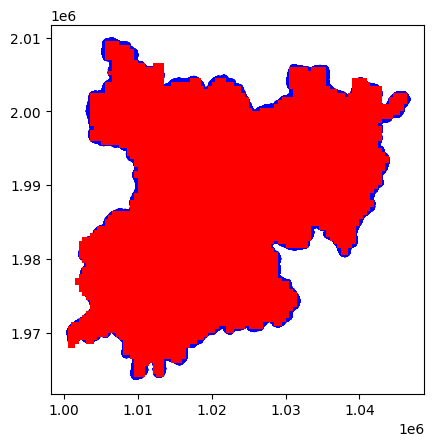

In [51]:
# 전체 경사도 데이터 시각화
ax = gdf_산사태_transformed.plot(color='blue', edgecolor='none')

# 춘천시 격자 데이터 시각화
춘천_gdf_total.plot(ax=ax, color='red', edgecolor='none')
plt.show()

In [52]:
# 2. 춘천시 격자, 전국 경사도 교집합 추출

gdf_intersection_춘천_산사태지수 = gpd.overlay(gdf_산사태_transformed, 춘천_gdf_total, how='intersection')
gdf_intersection_춘천_산사태지수 # FID와 격자 매핑필요

,value,gid,고령인구,20년 노후건물 비율,생산가능인구,유아비율,총인구,개별주택가격,주거용도면적,공시지가,...,value_소방서,value_경찰서,value_병원,value_보건기관,value_응급의료시설,value_의원,읍면동,배수_score,경사도_score,geometry
0,1,라아06a09a,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,...,5.080,5.476,38.778,5.448,31.944,5.496,사북면,1.73,6.00,POINT (1006397.507 2009429.331)
1,1,라아06a09a,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,...,5.080,5.476,38.778,5.448,31.944,5.496,사북면,1.73,6.00,POINT (1006407.502 2009429.277)
2,1,라아06a09a,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,...,5.080,5.476,38.778,5.448,31.944,5.496,사북면,1.73,6.00,POINT (1006417.498 2009429.223)
3,2,라아06a09a,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,...,5.080,5.476,38.778,5.448,31.944,5.496,사북면,1.73,6.00,POINT (1006427.493 2009429.169)
4,2,라아06a09a,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,...,5.080,5.476,38.778,5.448,31.944,5.496,사북면,1.73,6.00,POINT (1006437.489 2009429.116)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9296236,3,라사09b64a,8.0,8.0,0.0,0.0,9.0,80509090.91,145.74,43967.34,...,6.835,6.488,20.189,1.007,33.017,13.005,남면,1.53,4.23,POINT (1009713.763 1964220.467)
9296237,1,라사09b64a,8.0,8.0,0.0,0.0,9.0,80509090.91,145.74,43967.34,...,6.835,6.488,20.189,1.007,33.017,13.005,남면,1.53,4.23,POINT (1009733.754 1964220.36)
9296238,1,라사09b64a,8.0,8.0,0.0,0.0,9.0,80509090.91,145.74,43967.34,...,6.835,6.488,20.189,1.007,33.017,13.005,남면,1.53,4.23,POINT (1009743.749 1964220.307)
9296239,1,라사09b64a,8.0,8.0,0.0,0.0,9.0,80509090.91,145.74,43967.34,...,6.835,6.488,20.189,1.007,33.017,13.005,남면,1.53,4.23,POINT (1009753.745 1964220.253)


In [53]:
gdf_intersection_춘천_산사태지수.columns

Index(['value', 'gid', '고령인구', '20년 노후건물 비율', '생산가능인구', '유아비율', '총인구',
       '개별주택가격', '주거용도면적', '공시지가', '지상층수', '용적율', '지하층수',
       '대지면적', '연면적', '높이', '건폐율', '건축면적', '전체건물수',
       '20년 이상 노후건물 수', '노후건물비율', 'value_소방서', 'value_경찰서', 'value_병원',
       'value_보건기관', 'value_응급의료시설', 'value_의원', '읍면동', '배수_score',
       '경사도_score', 'geometry'],
      dtype='object')

In [54]:
set(gdf_intersection_춘천_산사태지수['value'])

{1, 2, 3, 4, 5}

In [55]:
gdf_intersection_춘천_산사태지수

,value,gid,고령인구,20년 노후건물 비율,생산가능인구,유아비율,총인구,개별주택가격,주거용도면적,공시지가,...,value_소방서,value_경찰서,value_병원,value_보건기관,value_응급의료시설,value_의원,읍면동,배수_score,경사도_score,geometry
0,1,라아06a09a,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,...,5.080,5.476,38.778,5.448,31.944,5.496,사북면,1.73,6.00,POINT (1006397.507 2009429.331)
1,1,라아06a09a,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,...,5.080,5.476,38.778,5.448,31.944,5.496,사북면,1.73,6.00,POINT (1006407.502 2009429.277)
2,1,라아06a09a,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,...,5.080,5.476,38.778,5.448,31.944,5.496,사북면,1.73,6.00,POINT (1006417.498 2009429.223)
3,2,라아06a09a,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,...,5.080,5.476,38.778,5.448,31.944,5.496,사북면,1.73,6.00,POINT (1006427.493 2009429.169)
4,2,라아06a09a,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,...,5.080,5.476,38.778,5.448,31.944,5.496,사북면,1.73,6.00,POINT (1006437.489 2009429.116)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9296236,3,라사09b64a,8.0,8.0,0.0,0.0,9.0,80509090.91,145.74,43967.34,...,6.835,6.488,20.189,1.007,33.017,13.005,남면,1.53,4.23,POINT (1009713.763 1964220.467)
9296237,1,라사09b64a,8.0,8.0,0.0,0.0,9.0,80509090.91,145.74,43967.34,...,6.835,6.488,20.189,1.007,33.017,13.005,남면,1.53,4.23,POINT (1009733.754 1964220.36)
9296238,1,라사09b64a,8.0,8.0,0.0,0.0,9.0,80509090.91,145.74,43967.34,...,6.835,6.488,20.189,1.007,33.017,13.005,남면,1.53,4.23,POINT (1009743.749 1964220.307)
9296239,1,라사09b64a,8.0,8.0,0.0,0.0,9.0,80509090.91,145.74,43967.34,...,6.835,6.488,20.189,1.007,33.017,13.005,남면,1.53,4.23,POINT (1009753.745 1964220.253)


In [56]:
산사태_dict = {}

# groupby를 사용해 gid별로 데이터를 그룹화
grouped = gdf_intersection_춘천_산사태지수.groupby('gid')

# 각 gid에 대해 data_len과 data_sum을 계산하여 dict에 저장
for gid, group in grouped:
    data_len = len(group)  # 그룹의 길이
    data_sum = group['value'].sum()  # 그룹의 'value' 합계
    산사태_dict[gid] = (data_len, data_sum)

In [57]:
산사태_dict

{'라사00b69a': (10, 28),
 '라사00b69b': (8, 31),
 '라사00b70a': (211, 792),
 '라사01a69a': (520, 1665),
 '라사01a69b': (1676, 4914),
 '라사01a70a': (2135, 8003),
 '라사01a70b': (883, 2559),
 '라사01b69a': (223, 611),
 '라사01b69b': (1837, 5156),
 '라사01b70a': (2135, 7133),
 '라사01b70b': (2103, 6953),
 '라사01b71a': (410, 1338),
 '라사02a69b': (830, 2059),
 '라사02a70a': (2478, 6983),
 '라사02a70b': (2500, 6797),
 '라사02a71a': (1953, 6399),
 '라사02a71b': (31, 98),
 '라사02a80b': (2, 7),
 '라사02b69a': (46, 171),
 '라사02b69b': (975, 3021),
 '라사02b70a': (2356, 8112),
 '라사02b70b': (2500, 6991),
 '라사02b71a': (2500, 8534),
 '라사02b71b': (967, 3196),
 '라사02b75b': (124, 461),
 '라사02b76a': (773, 2831),
 '라사02b76b': (986, 3785),
 '라사02b77a': (1395, 5597),
 '라사02b77b': (1137, 3787),
 '라사02b78a': (682, 2157),
 '라사02b78b': (14, 32),
 '라사02b80a': (756, 2512),
 '라사02b80b': (2294, 8914),
 '라사02b81a': (1341, 4571),
 '라사02b81b': (494, 1611),
 '라사03a69a': (920, 2872),
 '라사03a69b': (2145, 6964),
 '라사03a70a': (2499, 8493),
 '라사03a70b': (2503

In [58]:
len(set(춘천_gdf_total['gid']) & set(산사태_dict.keys()))

4513

In [59]:
산사태_df = pd.DataFrame.from_dict(산사태_dict, orient='index', columns=['산사태_길이', '산사태_값(합)'])
산사태_df.reset_index(inplace=True)
산사태_df.rename(columns={'index': 'gid'}, inplace=True)

In [60]:
산사태_df

,gid,산사태_길이,산사태_값(합)
0,라사00b69a,10,28
1,라사00b69b,8,31
2,라사00b70a,211,792
3,라사01a69a,520,1665
4,라사01a69b,1676,4914
...,...,...,...
4508,라아45b01b,2507,5907
4509,라아45b02a,712,1225
4510,라아46a01a,317,627
4511,라아46a01b,1213,3296


In [61]:
# 기존 데이터프레임과 병합 (outer join으로 기존 데이터에 없는 gid도 포함)
춘천_gdf_total = pd.merge(춘천_gdf_total, 산사태_df, on='gid', how='outer')

# '산사태_길이'와 '산사태_값(합)'의 NaN 값을 0으로 대체
춘천_gdf_total[['산사태_길이', '산사태_값(합)']] = 춘천_gdf_total[['산사태_길이', '산사태_값(합)']].fillna(0)


In [62]:
춘천_gdf_total.head()

,gid,고령인구,geometry,20년 노후건물 비율,생산가능인구,유아비율,총인구,개별주택가격,주거용도면적,공시지가,...,value_경찰서,value_병원,value_보건기관,value_응급의료시설,value_의원,읍면동,배수_score,경사도_score,산사태_길이,산사태_값(합)
0,라사00b68a,0.0,"POLYGON ((1000500 1968000, 1000500 1968500, 10...",0.0,0.0,0.0,0.0,0.00,0.0,0.00,...,0.000,0.000,0.000,0.000,0.000,남면,1.99,0.82,0.0,0.0
1,라사00b68b,0.0,"POLYGON ((1000500 1968500, 1000500 1969000, 10...",0.0,0.0,0.0,0.0,0.00,0.0,11809.22,...,0.000,0.000,0.000,0.000,0.000,남면,0.26,0.58,0.0,0.0
2,라사00b69a,0.0,"POLYGON ((1000500 1969000, 1000500 1969500, 10...",0.0,0.0,0.0,0.0,44888888.89,108.6,27235.46,...,25.755,36.655,9.500,39.476,31.857,남면,0.82,1.50,10.0,28.0
3,라사00b69b,0.0,"POLYGON ((1000500 1969500, 1000500 1970000, 10...",0.0,0.0,0.0,7.0,84575000.00,115.1,30886.45,...,21.965,37.084,9.929,39.905,32.286,남면,1.10,1.29,8.0,31.0
4,라사00b70a,0.0,"POLYGON ((1000500 1970000, 1000500 1970500, 10...",0.0,0.0,0.0,0.0,0.00,0.0,12103.04,...,7.724,10.478,3.718,36.820,7.712,남면,0.27,0.30,211.0,792.0


# 등고선(높이)

## 표고점 : https://www.vworld.kr/dtmk/dtmk_ntads_s002.do?svcCde=MK&dsId=30245

In [63]:
gdf_표고점 = gpd.read_file("표고점/N3P_F0020000.shp", encoding = 'cp949')
print(gdf_표고점.crs)

PROJCS["Korea_2000_Korea_Unified_Coordinate_System",GEOGCS["GCS_Korea_2000",DATUM["Korean_Geodetic_Datum_2002",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6737"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",38],PARAMETER["central_meridian",127.5],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",1000000],PARAMETER["false_northing",2000000],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]


In [64]:
gdf_표고점_transformed = gdf_표고점.to_crs("EPSG:5179")
print(gdf_표고점_transformed.crs)
gdf_표고점_transformed.head()

EPSG:5179


,UFID,NUME,SCLS,FMTA,geometry
0,100037814032F00211b073a80860c4764,621.41,F0027217,S2114224,POINT (1068845.028 1908293.547)
1,100037814008F0021abe1203d37444877,688.14,F0027217,S2114224,POINT (1083970.143 1914545.998)
2,100037814048F00212b83b75c20234349,443.09,F0027217,S2114224,POINT (1082174.153 1905336.892)
3,100037814017F0021ad26aed502f24a29,283.89,F0027217,S2114224,POINT (1080165.348 1912085.404)
4,100037814059F00211dd2f9570c5b4ff1,595.07,F0027217,S2114224,POINT (1085547.004 1901172.358)


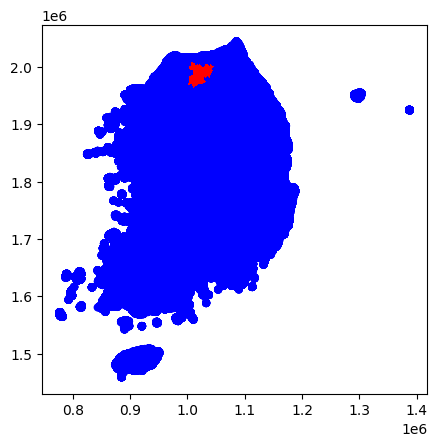

In [65]:
# 전체 배수등급 데이터 시각화
ax = gdf_표고점_transformed.plot(color='blue', edgecolor='none')

# 춘천시 격자 데이터 시각화
춘천_gdf_total.plot(ax=ax, color='red', edgecolor='none')

plt.show()

In [66]:
gdf_intersection_춘천_표고점 = gpd.overlay(gdf_표고점_transformed, 춘천_gdf_total, how='intersection')

In [67]:
print(gdf_intersection_춘천_표고점.columns)

gdf_intersection_춘천_표고점

Index(['UFID', 'NUME', 'SCLS', 'FMTA', 'gid', '고령인구', '20년 노후건물 비율', '생산가능인구',
       '유아비율', '총인구', '개별주택가격', '주거용도면적', '공시지가', '지상층수', '용적율',
       '지하층수', '대지면적', '연면적', '높이', '건폐율',
       '건축면적', '전체건물수', '20년 이상 노후건물 수', '노후건물비율', 'value_소방서',
       'value_경찰서', 'value_병원', 'value_보건기관', 'value_응급의료시설', 'value_의원',
       '읍면동', '배수_score', '경사도_score', '산사태_길이', '산사태_값(합)', 'geometry'],
      dtype='object')


,UFID,NUME,SCLS,FMTA,gid,고령인구,20년 노후건물 비율,생산가능인구,유아비율,총인구,...,value_병원,value_보건기관,value_응급의료시설,value_의원,읍면동,배수_score,경사도_score,산사태_길이,산사태_값(합),geometry
0,100038715092F0021ebb64066de934654,1436.70,F0027217,S2116778,라아03b00a,0.0,0.0,0.0,0.0,0.0,...,44.450,12.299,37.613,12.361,사북면,1.99,6.00,2205.0,8808.0,POINT (1003560.649 2000003.784)
1,100038715096F0021b2e7d3d458924782,284.27,F0027217,S2116778,라아11b01a,0.0,0.0,0.0,0.0,0.0,...,14.818,2.529,17.569,16.916,사북면,1.83,3.90,2370.0,6684.0,POINT (1011845.597 2001170.049)
2,100038715099F0021dc04b998cce04cb7,215.83,F0027217,S2116778,라아18b00a,0.0,0.0,0.0,0.0,0.0,...,11.369,2.231,18.670,11.858,사북면,1.71,5.73,2467.0,7678.0,POINT (1018692.511 2000023.683)
3,100038715098F0021e4698d5c9f7046d0,276.54,F0027217,S2116778,라아17a00a,0.0,0.0,0.0,0.0,0.0,...,14.214,3.984,21.514,14.703,사북면,1.88,3.40,1770.0,5142.0,POINT (1017318.475 2000027.045)
4,100038715098F0021f713c9e7e9f7459b,130.14,F0027217,S2116778,라아16b00a,14.0,14.0,0.0,0.0,18.0,...,13.176,2.946,20.475,13.664,사북면,2.00,4.13,1392.0,3745.0,POINT (1016593.396 2000032.644)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44782,100037707002F00218c185fd7f9bf44df,52.40,F0027217,S2111515,라사02b72a,0.0,0.0,0.0,0.0,0.0,...,0.000,0.000,0.000,0.000,남면,1.44,3.13,0.0,0.0,POINT (1002778.007 1972251.046)
44783,100037707002F00212072fe48e4b84d3b,52.70,F0027217,S2111515,라사02b69b,0.0,0.0,7.0,0.0,12.0,...,33.745,6.590,36.565,28.947,남면,1.21,5.61,975.0,3021.0,POINT (1002862.104 1969533.565)
44784,100037707002F00210400b93a1c594ac3,52.90,F0027217,S2111515,라사02b69b,0.0,0.0,7.0,0.0,12.0,...,33.745,6.590,36.565,28.947,남면,1.21,5.61,975.0,3021.0,POINT (1002792.895 1969625.288)
44785,100037707002F00214f1c696c86674dfb,53.70,F0027217,S2111515,라사02b71b,0.0,0.0,0.0,0.0,0.0,...,14.819,3.509,38.554,11.521,남면,0.83,0.39,967.0,3196.0,POINT (1002623.565 1971595.268)


In [68]:
# 그룹별 평균 값을 계산하고, 'NUME' 컬럼에 대해 'gid'별로 평균을 구한 후 dict로 변환
height_dict = gdf_intersection_춘천_표고점.groupby('gid')['NUME'].mean().round(2).to_dict()

In [69]:
춘천_gdf_total['높이_score'] = 춘천_gdf_total['gid'].map(height_dict)

In [70]:
춘천_gdf_total

,gid,고령인구,geometry,20년 노후건물 비율,생산가능인구,유아비율,총인구,개별주택가격,주거용도면적,공시지가,...,value_병원,value_보건기관,value_응급의료시설,value_의원,읍면동,배수_score,경사도_score,산사태_길이,산사태_값(합),높이_score
0,라사00b68a,0.0,"POLYGON ((1000500 1968000, 1000500 1968500, 10...",0.0,0.0,0.0,0.0,0.00,0.0,0.00,...,0.000,0.000,0.000,0.000,남면,1.99,0.82,0.0,0.0,86.48
1,라사00b68b,0.0,"POLYGON ((1000500 1968500, 1000500 1969000, 10...",0.0,0.0,0.0,0.0,0.00,0.0,11809.22,...,0.000,0.000,0.000,0.000,남면,0.26,0.58,0.0,0.0,52.90
2,라사00b69a,0.0,"POLYGON ((1000500 1969000, 1000500 1969500, 10...",0.0,0.0,0.0,0.0,44888888.89,108.6,27235.46,...,36.655,9.500,39.476,31.857,남면,0.82,1.50,10.0,28.0,56.78
3,라사00b69b,0.0,"POLYGON ((1000500 1969500, 1000500 1970000, 10...",0.0,0.0,0.0,7.0,84575000.00,115.1,30886.45,...,37.084,9.929,39.905,32.286,남면,1.10,1.29,8.0,31.0,57.86
4,라사00b70a,0.0,"POLYGON ((1000500 1970000, 1000500 1970500, 10...",0.0,0.0,0.0,0.0,0.00,0.0,12103.04,...,10.478,3.718,36.820,7.712,남면,0.27,0.30,211.0,792.0,58.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5394,라아45b01b,0.0,"POLYGON ((1045500 2001500, 1045500 2002000, 10...",0.0,0.0,0.0,0.0,0.00,0.0,0.00,...,21.608,11.909,21.608,21.674,북산면,1.10,3.24,2507.0,5907.0,403.82
5395,라아45b02a,0.0,"POLYGON ((1045500 2002000, 1045500 2002500, 10...",0.0,0.0,0.0,0.0,0.00,0.0,0.00,...,19.611,12.754,19.611,19.677,북산면,0.21,3.33,712.0,1225.0,NaN
5396,라아46a01a,0.0,"POLYGON ((1046000 2001000, 1046000 2001500, 10...",0.0,0.0,0.0,0.0,0.00,0.0,0.00,...,0.000,0.000,0.000,0.000,북산면,1.00,4.62,317.0,627.0,512.28
5397,라아46a01b,0.0,"POLYGON ((1046000 2001500, 1046000 2002000, 10...",0.0,0.0,0.0,0.0,0.00,0.0,0.00,...,21.110,11.411,21.110,21.177,북산면,0.62,1.92,1213.0,3296.0,NaN


# 불투수율

## 데이터 : https://egis.me.go.kr/intro/land.do
## 불투수율 생성 기준 : https://egis.me.go.kr/atlas/view.do

설재배지(231), 목장·양어장(251) 제외한 불투수면적  = raster_value=1 값에 포함

In [71]:
shp_files_불투수율 = [f for f in os.listdir("불투수율") if f.endswith('.shp')]

In [72]:
# 컬럼구성 확인

gdf_temp = gpd.read_file(f"불투수율/{shp_files_불투수율[0]}")
gdf_temp

for c in gdf_temp.columns:
    print(f'{c} : {len(set(gdf_temp[c]))}, {set(gdf_temp[c])}')

L2_CODE : 20, {'110', '250', '220', '150', '130', '240', '210', '620', '120', '410', '160', '510', '320', '310', '230', '140', '420', '710', '610', '330'}
L2_NAME : 20, {'내륙습지', '침엽수림', '시설재배지', '주거지역', '공업지역', '기타재배지', '내륙수', '공공시설지역', '인공초지', '논', '교통지역', '문화·체육·휴양지', '상업지역', '자연나지', '자연초지', '과수원', '밭', '혼효림', '활엽수림', '인공나지'}
IMG_NAME : 1, {'항공정사영상'}
IMG_DATE : 1, {Timestamp('2022-12-31 00:00:00')}
ETC_INFO : 1, {None}
UD_INFO : 1, {'2023년 사업-세분류 토지피복지도'}
INX_NUM : 1, {'377031'}
geometry : 11899, {<POLYGON ((250219.308 592595.383, 250244.308 592595.383, 250244.308 592585.3...>, <POLYGON ((252354.308 591245.383, 252359.308 591245.383, 252359.308 591240.3...>, <POLYGON ((251474.308 587530.383, 251479.308 587530.383, 251479.308 587525.3...>, <POLYGON ((251084.308 587605.383, 251094.308 587605.383, 251094.308 587600.3...>, <POLYGON ((249539.308 589030.383, 249544.308 589030.383, 249544.308 589020.3...>, <POLYGON ((249924.308 589050.383, 249929.308 589050.383, 249929.308 589015.3...>, <PO

In [73]:
# 선택할 컬럼명 리스트
choosed_col = ['L2_CODE', 'L2_NAME', 'geometry']

# 빈 리스트에 각 shapefile의 GeoDataFrame을 저장한 후, 병합할 예정
gdf_list = []

for shp_file in shp_files_불투수율:
    # 각 Shapefile의 전체 경로
    file_path = os.path.join("불투수율", shp_file)
    
    # GeoDataFrame으로 파일 읽기
    gdf = gpd.read_file(file_path)
    
    # 선택한 컬럼들만 자르기
    gdf_selected = gdf[choosed_col]
    
    # 리스트에 추가
    gdf_list.append(gdf_selected)

# 모든 GeoDataFrame 병합 (ignore_index=True로 인덱스를 새로 부여)
merged_gdf_불투수율 = gpd.GeoDataFrame(pd.concat(gdf_list, ignore_index=True))

In [74]:
print(merged_gdf_불투수율.crs)

PROJCS["Korea_2000_Korea_Central_Belt_2010",GEOGCS["GCS_Korea_2000",DATUM["Korean_Geodetic_Datum_2002",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6737"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",38],PARAMETER["central_meridian",127],PARAMETER["scale_factor",1],PARAMETER["false_easting",200000],PARAMETER["false_northing",600000],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]


In [75]:
merged_gdf_불투수율_transformed = merged_gdf_불투수율.to_crs("EPSG:5179")
print(merged_gdf_불투수율_transformed.crs)
merged_gdf_불투수율_transformed.head()

EPSG:5179


,L2_CODE,L2_NAME,geometry
0,320,침엽수림,"POLYGON ((1010348.682 2000006.78, 1010353.68 2..."
1,210,논,"POLYGON ((1010618.56 2000005.33, 1010653.545 2..."
2,320,침엽수림,"POLYGON ((1010283.711 2000007.129, 1010328.691..."
3,510,내륙습지,"POLYGON ((1008464.473 2000006.908, 1008484.464..."
4,310,활엽수림,"POLYGON ((1008774.334 2000005.243, 1008784.33 ..."


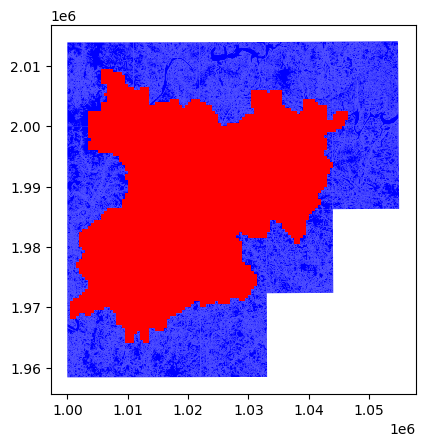

In [76]:
# 전체 배수등급 데이터 시각화
ax = merged_gdf_불투수율_transformed.plot(color='blue', edgecolor='none')

# 춘천시 격자 데이터 시각화
춘천_gdf_total.plot(ax=ax, color='red', edgecolor='none')

plt.show()

In [77]:
merged_gdf_불투수율_transformed

,L2_CODE,L2_NAME,geometry
0,320,침엽수림,"POLYGON ((1010348.682 2000006.78, 1010353.68 2..."
1,210,논,"POLYGON ((1010618.56 2000005.33, 1010653.545 2..."
2,320,침엽수림,"POLYGON ((1010283.711 2000007.129, 1010328.691..."
3,510,내륙습지,"POLYGON ((1008464.473 2000006.908, 1008484.464..."
4,310,활엽수림,"POLYGON ((1008774.334 2000005.243, 1008784.33 ..."
...,...,...,...
201262,320,침엽수림,"POLYGON ((1044179.68 2000164.853, 1044189.676 ..."
201263,320,침엽수림,"POLYGON ((1044440.252 2000293.394, 1044460.243..."
201264,310,활엽수림,"POLYGON ((1045909.829 2002199.618, 1045944.811..."
201265,310,활엽수림,"POLYGON ((1043905.217 2000241.294, 1043920.21 ..."


In [78]:
gdf_intersection_춘천_불투수율 = gpd.overlay(merged_gdf_불투수율_transformed, 춘천_gdf_total, how='intersection')

<Axes: >

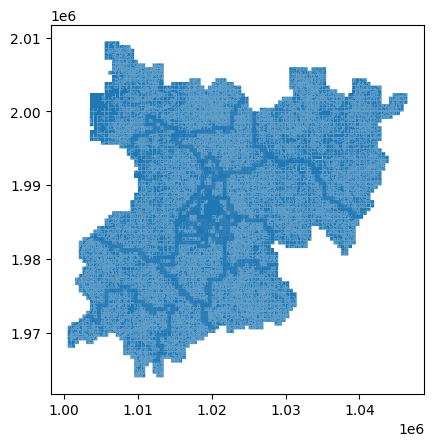

In [79]:
gdf_intersection_춘천_불투수율.plot()

In [80]:
print(set(gdf_intersection_춘천_불투수율['L2_NAME']))

불투수_list = ['주거지역', '공업지역', '상업지역', '문화·체육·휴양지', '교통지역', '공공시설지역', '시설재배지', '기타재배지']

{'내륙습지', '침엽수림', '시설재배지', '주거지역', '공업지역', '기타재배지', '내륙수', '공공시설지역', '인공초지', '논', '교통지역', '문화·체육·휴양지', '상업지역', '자연나지', '자연초지', '과수원', '밭', '혼효림', '활엽수림', '인공나지'}


In [81]:
불투수율_dict = {}

# L2_NAME이 불투수 리스트에 포함된 데이터만 미리 필터링
gdf_불투수 = gdf_intersection_춘천_불투수율[gdf_intersection_춘천_불투수율['L2_NAME'].isin(불투수_list)]

# 각 gid별로 그룹화 후 불투수율 계산
total_counts = gdf_intersection_춘천_불투수율.groupby('gid').size()  # 각 gid별 전체 데이터 수
불투수_counts = gdf_불투수.groupby('gid').size()  # 각 gid별 불투수 데이터 수

# 불투수율 계산 (불투수 수 / 전체 수)
불투수율_dict = (불투수_counts / total_counts).fillna(0).round(2).to_dict()

In [82]:
춘천_gdf_total['불투수율_score'] = 춘천_gdf_total['gid'].map(불투수율_dict)

In [83]:
춘천_gdf_total.to_csv('춘천_final.csv')